In [1]:
import os
import cv2
import numpy as np
from matplotlib import pyplot as plt

import segmentation_models as sm
sm.set_framework('tf.keras')
sm.framework()

from tensorflow.keras.models import load_model
from tensorflow.keras.metrics import MeanIoU
import random

2022-09-20 20:23:22.341926: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/xuanjinglee/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/cv2/../../lib64:
2022-09-20 20:23:22.342440: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


Segmentation Models: using `keras` framework.


In [2]:
model_dir = os.path.abspath("xBD/spacenet_gt/models/spacenet_gt_model_filtered_model_10_epoch.hdf5")

In [3]:
model = load_model(model_dir,
                   compile=False,
                   custom_objects={"focal_loss_plus_jaccard_loss": sm.losses.categorical_focal_jaccard_loss,
                                  "iou_score": sm.metrics.iou_score})

2022-09-20 20:28:46.857575: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/xuanjinglee/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/cv2/../../lib64:
2022-09-20 20:28:46.857656: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-09-20 20:28:46.857699: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (DESKTOP-08SS04J): /proc/driver/nvidia/version does not exist
2022-09-20 20:28:46.858222: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriat

In [38]:
test_img_dir = os.path.abspath("xBD/spacenet_gt/images/hurricane-harvey_00000333_pre_disaster.png")
test_label_dir = os.path.abspath("xBD/spacenet_gt/labels/hurricane-harvey_00000333_pre_disaster.png")
test_img = cv2.cvtColor(cv2.imread(test_img_dir, 1), cv2.COLOR_BGR2RGB).reshape((1, 1024, 1024, 3))
test_label = cv2.imread(test_label_dir, 0)

In [39]:
prediction = model.predict(test_img)

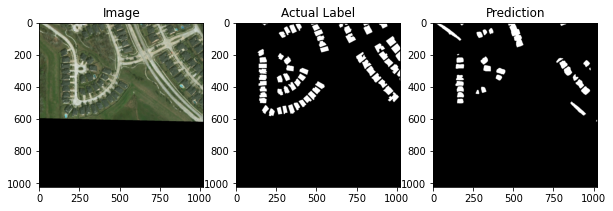

In [40]:
plt.figure(figsize=(10,10))
plt.subplot(1,3,1)
plt.title("Image")
plt.imshow(test_img[0])
plt.subplot(1,3,2)
plt.title("Actual Label")
plt.imshow(test_label, cmap="gray")
plt.subplot(1,3,3)
plt.title("Prediction")
plt.imshow(np.argmax(prediction[0], axis=2), cmap="gray")